In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
auto=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/auto.csv")
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#Checking for null values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

We observe that there are no Null Values

In [4]:
#To know about the features
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
#A. Doing Linear Regression for response variable mpg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Assigning predictor and response variables
Y=list(auto["mpg"])
X=list(auto["horsepower"])
Y1=pd.DataFrame(Y)
X1=pd.DataFrame(X)

#splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.3, random_state=10)

#doing linear regression 
lm=LinearRegression().fit(X_train, Y_train)


In [6]:
#To know the parameter found using trained model
intercept=lm.intercept_[0]
print(intercept)

slope=lm.coef_
print(slope[0][0])

40.61286169928138
-0.16090074717603675


Conclusion: The slope of the model is -0.16090074717603675 and the intercept is 40.61286169928138

C:\Users\jesto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


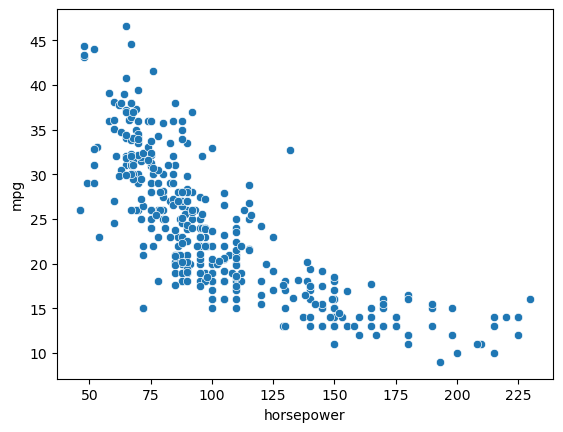

In [7]:
#1. Relation between response and predictor
sns.scatterplot(auto["horsepower"],auto["mpg"])

plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/1.Scatter.png")

Interpretation: We observe that there exists a patter between the two variables and hence a linear relationship exists.

In [8]:
#2. Correlation between mpg and horespower
auto["mpg"].corr(auto["horsepower"],method='pearson')

-0.7784267838977762

Interpretation: We observe that there is a strong negative correlation between the predictor and response variables.

In [9]:
#3. From the correlation and the scatter plot we can concur that there is a negative relation between both the varibles

In [10]:
#4. Prediction for horsepower 98

y_pred1 = slope[0][0]*98 +intercept #using direct formula
y_pred1

#or

y_pred2=lm.predict([[98]]) #using inbuilt function to predict
y_pred2


array([[24.84458848]])

Conclusion: For a horsepower of 98 we have the mpg value as 24.84458848

In [13]:
#USING X-TEST to predict Y

Y_PRED=lm.predict(X_test)
Y_PRED

array([[22.91377951],
       [27.09719894],
       [26.13179445],
       [30.95881687],
       [18.08675709],
       [14.06423842],
       [19.69576457],
       [12.45523094],
       [32.88962583],
       [25.32729072],
       [24.52278698],
       [29.0280079 ],
       [27.41900043],
       [25.80999296],
       [14.06423842],
       [16.47774962],
       [25.32729072],
       [27.57990118],
       [ 8.43271226],
       [ 5.21469732],
       [11.65072721],
       [29.18890865],
       [26.45359595],
       [17.28225336],
       [14.06423842],
       [ 7.14550629],
       [24.52278698],
       [29.67161089],
       [26.13179445],
       [26.13179445],
       [24.52278698],
       [26.13179445],
       [27.90170267],
       [27.57990118],
       [26.93629819],
       [27.25809968],
       [32.88962583],
       [22.91377951],
       [16.47774962],
       [26.13179445],
       [26.13179445],
       [25.00548922],
       [29.3498094 ],
       [27.74080193],
       [24.20098549],
       [16

In [14]:
#Fitting the model using scipy.stats without using train and test
import scipy.stats
b1, b0, r_value, p_value, std_err = scipy.stats.linregress(X,Y)
print("Intercept:",b0)
print("Coefficient:",b1)
print("R2 Value:",r_value)
print("p value:",p_value)
print("Std. Error:",std_err)

Intercept: 39.935861021170474
Coefficient: -0.15784473335365368
R2 Value: -0.7784267838977762
p value: 7.031989029403061e-81
Std. Error: 0.006445500517685033


In [15]:
import statsmodels.api as sm
r2_1=lm.score(X_test,Y_test)
print("Model accuracy using statsmodels:",r2_1)

#or

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_PRED)
r2_2 = r2_score(Y_test, Y_PRED)
print("MSE:",mse)
print("Model accuracy using sklearnmetrics:",r2_2)

Model accuracy using statsmodels: 0.5956667983866821
MSE: 22.89199616210195
Model accuracy using sklearnmetrics: 0.5956667983866821


Interpretation: We see that the model accuracy is 0.59 which is moderately good.

In [21]:
#CONFIDENCE INTERVALS & PREDICTION INTERVALS

#converting 98 to dataframe
x_pred = sm.add_constant(pd.DataFrame({"horsepower": [98]}))

#The model
model= ols("mpg ~ horsepower", data=auto).fit()

#getting confidence intervals
predictions = model.get_prediction(x_pred)
ci=predictions.summary_frame(alpha=0.05)
ci


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Interpretation: 
*We get the CI as [23.973079,24.961075]
*We get the PI as [14.809396,34.124758]

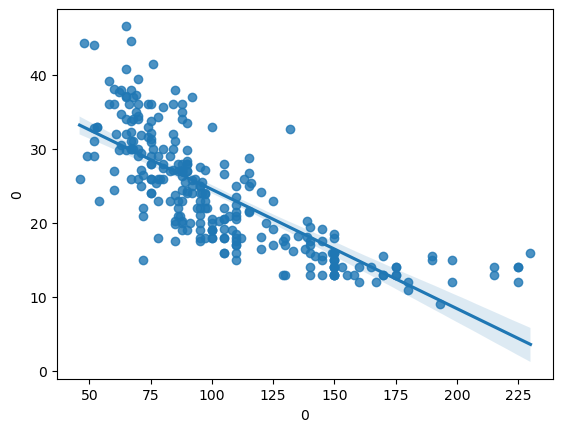

In [222]:
#CI PLOT
sns.regplot(X_train, Y_train)

plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/6.CI.png")

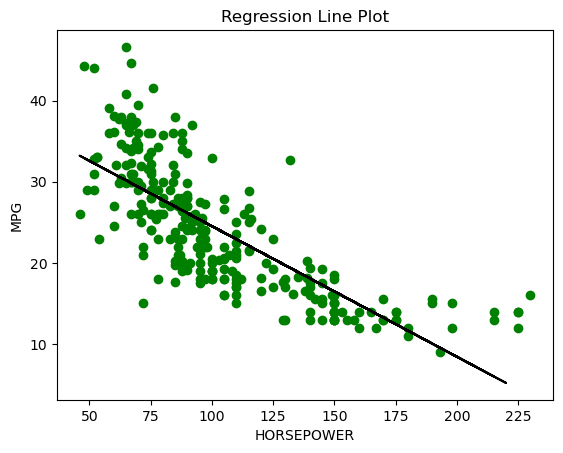

In [190]:
#B. Plot the response and the predictor.

plt.scatter(X_train, Y_train,color='g') 
plt.plot(X_test, Y_PRED,color='k') 

plt.xlabel("HORSEPOWER")
plt.ylabel("MPG")
plt.title("Regression Line Plot")

plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/2.RegressionLine.png")

C. Use the plot() function to produce diagnostic plots of the least squares regression fit. 
Comment on any problems you see with the fit.


1. The Component-Component plus Residual (CCPR)

The CCPR plot provides another way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. They are also a good way to see if the predictors have a linear relationship with the dependent variable.

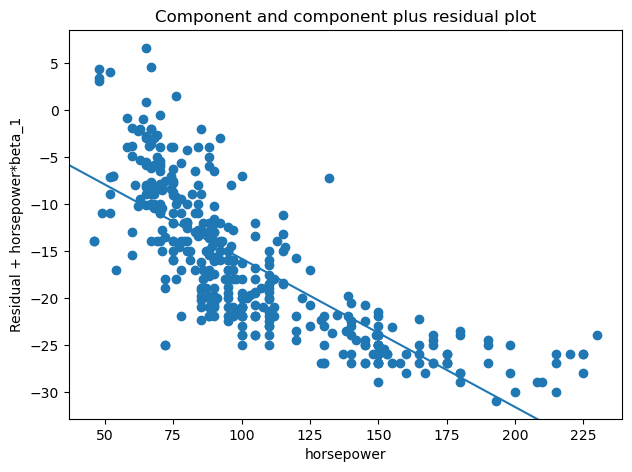

In [194]:
#CCPR PLOT
fig = sm.graphics.plot_ccpr(model,"horsepower")
fig.tight_layout(pad=1.0)

plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/3.CCPR.png")

Interpretation: We observe that there is no significant difference between the residual line and the actual distribution of values whihc indicates that the predictor has a linear relationship with the dependent variable.

2. Residuals vs fitted plot

Residual plots are a useful graphical tool for identifying non-linearity as well as heteroscedasticity. The residuals of this plot are those of the regression fit with all predictors.



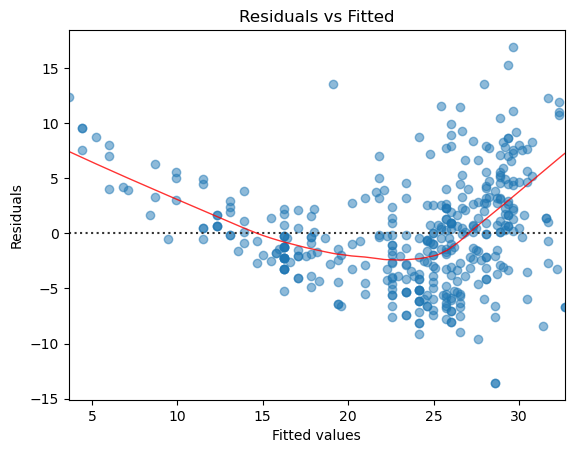

In [197]:
#Residuals vs fitted plot
# fitted values
model_fitted_y = model.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='mpg', data=auto, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

#saving
plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/3.ResidualvsFitted.png")

Interpretation:
* The residuals approximately spread evenly about the horizontal dotted line. Hence assumption of linearity holds.
* The residuals are not spread evenly and hence this suggests that the variances of the error terms are not equal.


eval_env: 1


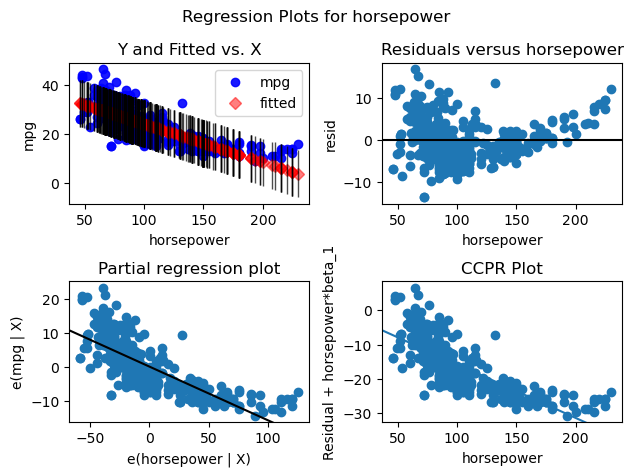

In [199]:
fig = sm.graphics.plot_regress_exog(model, "horsepower")
fig.tight_layout(pad=1.0)

#saving
plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program2/5.RegressionPlots.png")